In [1]:
pip install -e .

ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /Users/macbook/Documents/GitHub/IFT6758_Milestone-1
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ift6758.data import get_player_stats
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import matplotlib.pyplot as plt

In [3]:
df = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


In [4]:
df.columns

Index(['Rk', 'Player', 'Age', 'Tm', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA',
       'SV', 'SV%', 'GAA', 'SO', 'GPS', 'MIN', 'QS', 'QS%', 'RBS', 'GA%-',
       'GSAA', 'G', 'A', 'PTS', 'PIM'],
      dtype='object')

In [17]:
player_stat = df.apply(pd.to_numeric, errors='ignore').sort_values(by='SV%', ascending=False)#[['SA','SV','Player','SV%']]

def highlight_columns(df, rows=20, color='lightgreen', columns_to_shadow=[], columns_to_show=[]):
    highlight = lambda slice_of_df: 'background-color: %s' % color
    sample_df = df.head(rows)
    if len(columns_to_show) != 0:
        sample_df = sample_df[columns_to_show]
    highlighted_df = sample_df.style.applymap(highlight, subset=pd.IndexSlice[:, columns_to_shadow])
    return highlighted_df

highlight_columns(player_stat, rows=95, color='lightblue',columns_to_shadow=['SV%','W'])
#player_stat

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,7,7,1.000000,0.000000,0,0.100000,14,0,nan,0,nan,nan,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,14,14,1.000000,0.000000,0,0.200000,39,0,nan,0,nan,nan,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,10,10,1.000000,0.000000,0,0.200000,29,0,nan,0,nan,nan,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,93,88,0.946000,1.780000,1,0.900000,169,3,1.000000,0,nan,nan,0,0,0,0
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,55,52,0.945000,1.450000,0,0.500000,124,0,0.000000,0,nan,nan,0,0,0,0
37,39,Andrew Hammond,29,COL,1,1,0,1,0,2,33,31,0.939000,2.060000,0,0.300000,58,1,1.000000,0,nan,nan,0,0,0,0
83,90,Linus Ullmark,24,BUF,5,3,1,2,0,8,123,115,0.935000,2.000000,0,1.000000,240,2,0.667000,0,nan,nan,0,0,0,0
60,64,Curtis McElhinney,34,TOR,18,15,11,5,1,35,528,493,0.934000,2.140000,3,4.200000,979,8,0.533000,1,76.000000,11.340000,0,1,1,0
43,45,Carter Hutton,32,STL,32,26,17,7,3,56,810,754,0.931000,2.090000,3,6.200000,1610,19,0.731000,2,79.000000,15.090000,0,0,0,2
70,77,Antti Raanta,28,ARI,47,46,21,17,6,97,1388,1291,0.930000,2.240000,3,10.400000,2599,32,0.696000,6,80.000000,24.820000,0,0,0,0


In [6]:
player_stat_reduit = player_stat.sort_values(by=['W','SV%'], ascending=False)[['Player','W','SV%']]
player_stat_reduit

,Player,W,SV%
38,Connor Hellebuyck,44,0.924
85,Andrei Vasilevskiy,44,0.920
73,Pekka Rinne,42,0.927
1,Frederik Andersen,38,0.918
8,Sergei Bobrovsky,37,0.921
22,Devan Dubnyk,35,0.918
71,Tuukka Rask,34,0.917
40,Braden Holtby,34,0.907
69,Jonathan Quick,33,0.921
30,John Gibson,31,0.926


In [7]:
pd_player = player_stat_reduit.astype(str)['Player']
pd_player[:20]

38     Connor Hellebuyck
85    Andrei Vasilevskiy
73           Pekka Rinne
1      Frederik Andersen
8       Sergei Bobrovsky
22          Devan Dubnyk
71           Tuukka Rask
40         Braden Holtby
69        Jonathan Quick
30           John Gibson
81            Cam Talbot
46          Martin Jones
25     Marc-Andre Fleury
63           Matt Murray
0             Jake Allen
7             Ben Bishop
55      Henrik Lundqvist
48         Keith Kinkaid
78            Mike Smith
84       Semyon Varlamov
Name: Player, dtype: object

In [8]:
pd_SV = player_stat_reduit['SV%']

In [9]:
pd_SV[:20]

38    0.924
85    0.920
73    0.927
1     0.918
8     0.921
22    0.918
71    0.917
40    0.907
69    0.921
30    0.926
81    0.908
46    0.915
25    0.927
63    0.907
0     0.906
7     0.916
55    0.915
48    0.913
78    0.916
84    0.920
Name: SV%, dtype: float64

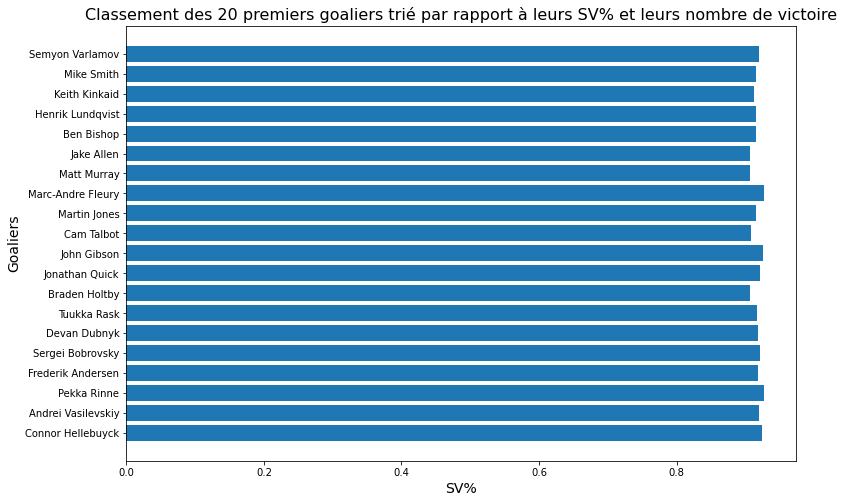

In [16]:
plt.barh(pd_player[:20],pd_SV[:20])
plt.xlabel("SV%",fontsize=14)
plt.ylabel("Goaliers",fontsize=14)
plt.rcParams['figure.figsize'] = [12, 6]
plt.title("Classement des 20 premiers goaliers trié par rapport à leurs SV% et leurs nombre de victoire",fontsize=16)
#plt.figure(figsize=(50, 30))
plt.show()